In [1]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

#### Import your dataset

Disini coba ganti setiap path sesuai path yang benernya di local kalian / di drive gimana

In [3]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf

#Change every path to your dataset train, and test path

source_path_train = '/Users/arsyaninsa/Documents/Data_Personal/Kuliah/Bangkid/Nyobas Modelling/dataset_many/train'
source_path_test = '/Users/arsyaninsa/Documents/Data_Personal/Kuliah/Bangkid/Nyobas Modelling/dataset_many/test'


### Prepare Pre-trained model
Download the inception model for pre-trained

### Generate data
Using ImageGenerator from Keras.
This function include augmentation to optimize training data image

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, UnidentifiedImageError

def train_val_generators(train_folder, test_folder):
    """
    TRAIN VAL GENERATORS
    """
    # Set the image
    img_size = (150, 150)

    # Instantiate the ImageDataGenerator class
    # augmenting the images
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255.)

    # Load training images and labels
    train_generator = train_datagen.flow_from_directory(
        train_folder,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical'
    )

    # Load testing images and labels
    validation_generator = validation_datagen.flow_from_directory(
        test_folder,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical'
    )

    #INI BUAT NGECEK IMAGE YANG GABISA DIBUKA
    # NAnti dia akan ngasi tau nama file image yang ga sesuai format or corrupt data
    for file_path in train_generator.filepaths + validation_generator.filepaths:
        try:
            img = Image.open(file_path)
        except (OSError, Image.UnidentifiedImageError):
            print(f"UnidentifiedImageError: cannot identify image file: {file_path}")

    return train_generator, validation_generator

In [5]:
train_generator, validation_generator = train_val_generators(source_path_train, source_path_test)

Found 4291 images belonging to 17 classes.
Found 1019 images belonging to 17 classes.


In [6]:
# Get a batch of data from the generators
train_images, train_labels = next(train_generator)
validation_images, validation_labels = next(validation_generator)

print(f"Images of training generator have shape: {train_images.shape}")
print(f"Labels of training generator have shape: {train_labels.shape}")
print(f"Images of validation generator have shape: {validation_images.shape}")
print(f"Labels of validation generator have shape: {validation_labels.shape}")

Images of training generator have shape: (32, 150, 150, 3)
Labels of training generator have shape: (32, 17)
Images of validation generator have shape: (32, 150, 150, 3)
Labels of validation generator have shape: (32, 17)


In [7]:
num_validation_samples = len(validation_generator.labels)
print(f"Total number of labels in the validation set: {num_validation_samples}")

Total number of labels in the validation set: 1019


###### FINAL MODEL

Cek classnya ada berapa

In [8]:
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(), 
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'), 
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
      tf.keras.layers.Dense(17, activation='softmax')
  ])


  model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
    
  ### END CODE HERE

  return model

In [9]:

# Save your model in a variable
model = create_model()

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 9,502,769 total parameters in this model.
There are 9,502,769 trainable parameters in this model.


In [10]:
#call backs

# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [11]:
# TRAINING FIT
# epoch adjust sesuai kebutuhan
callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15


2023-06-06 18:19:24.457967: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


100/135 [=====================>........] - ETA: 10s - loss: 2.1141 - accuracy: 0.3567

/Users/arsyaninsa/anaconda3/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 [==============================] - 49s 362ms/step - loss: 1.9597 - accuracy: 0.4032 - val_loss: 1.6720 - val_accuracy: 0.4858
Epoch 2/15
135/135 [==============================] - 48s 355ms/step - loss: 1.3242 - accuracy: 0.5798 - val_loss: 1.5890 - val_accuracy: 0.4946
Epoch 3/15
135/135 [==============================] - 48s 356ms/step - loss: 1.1642 - accuracy: 0.6304 - val_loss: 1.3831 - val_accuracy: 0.5564
Epoch 4/15
135/135 [==============================] - 48s 356ms/step - loss: 1.1039 - accuracy: 0.6479 - val_loss: 1.4040 - val_accuracy: 0.5496
Epoch 5/15
135/135 [==============================] - 48s 355ms/step - loss: 1.0100 - accuracy: 0.6754 - val_loss: 1.2466 - val_accuracy: 0.6035
Epoch 6/15
135/135 [==============================] - 48s 357ms/step - loss: 0.9885 - accuracy: 0.6833 - val_loss: 1.1758 - val_accuracy: 0.6477
Epoch 7/15
135/135 [==============================] - 49s 361ms/step - loss: 0.9016 - accuracy: 0.7019 - val_loss: 1.3658 - val_accuracy: 0.5

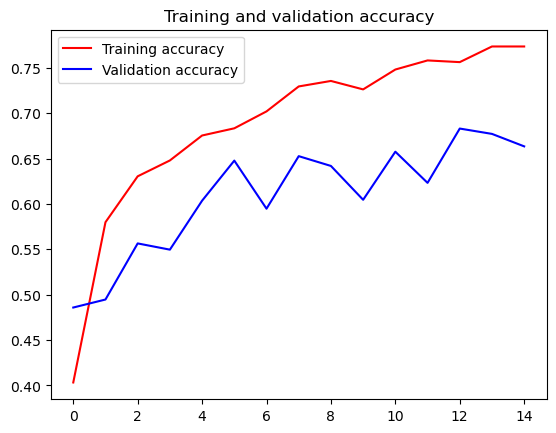

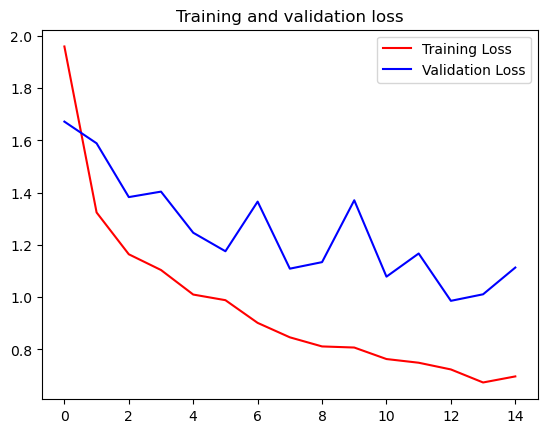

In [12]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


In [13]:
# Get the class labels and their corresponding indices
class_labels = train_generator.class_indices

# Reverse the dictionary to get the label-to-index mapping
label_to_index = {v: k for k, v in class_labels.items()}

class_names = []

# Print the labels
print("Class Labels:")
for label, index in label_to_index.items():
    print(f"Index: {index}, Label: {label}")
    class_names.append(index)

Class Labels:
Index: Aglaonema, Label: 0
Index: Aloe Vera, Label: 1
Index: Apple, Label: 2
Index: Caladium, Label: 3
Index: Calathea, Label: 4
Index: Cassava, Label: 5
Index: Grape, Label: 6
Index: Jasmine, Label: 7
Index: Lavender, Label: 8
Index: Lili Paris, Label: 9
Index: Lily, Label: 10
Index: Monstera Andansonii, Label: 11
Index: Rose, Label: 12
Index: Sansevieria, Label: 13
Index: Soybean, Label: 14
Index: Tomato, Label: 15
Index: sunflower, Label: 16


In [14]:

# Load the image you want to predict
image_path = "/Users/arsyaninsa/Documents/Data_Personal/Kuliah/Bangkid/Nyobas Modelling/dataset/train/Apple leaf/Apple leaf (19).jpg"
image = Image.open(image_path)
image = image.resize((150, 150))  # Resize the image to match the input size of the model

# Preprocess the image
image_array = np.array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)  # Add a batch dimension

# Make the prediction
prediction = model.predict(image_array)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 141ms/step
Predicted class: Apple
